In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Introduction To The Data

We will begin by examining some numerical and graphical summaries of the **Smarket** data, which is part of the ISLR library for our textbook. 

This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, we have recorded the percentage returns for each of the five previous trading days, *Lag1* through *Lag5*. We have also recorded *Volume* (the number of shares traded on the previous day, in billions), *Today* (the percentage return on the date in question) and *Direction* (whether the market was Up or Down on this date). 

In this example, we will fit a logistic regression model in order to predict *Direction* using *Lag1* through *Lag5* and *Volume*. 

In [5]:
# Read Smarket.csv into a Dataframe named stocks
stocks = pd.read_csv('Data/Smarket.csv') 

# print the information of the dataset
print(stocks.info())

# print # of rows, # of columns
print(stocks.shape)

# print the first row
print(stocks.loc[0])

# print the first five rows
print(stocks.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
Unnamed: 0    1250 non-null int64
Year          1250 non-null int64
Lag1          1250 non-null float64
Lag2          1250 non-null float64
Lag3          1250 non-null float64
Lag4          1250 non-null float64
Lag5          1250 non-null float64
Volume        1250 non-null float64
Today         1250 non-null float64
Direction     1250 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 97.7+ KB
None
(1250, 10)
Unnamed: 0         1
Year            2001
Lag1           0.381
Lag2          -0.192
Lag3          -2.624
Lag4          -1.055
Lag5            5.01
Volume        1.1913
Today          0.959
Direction         Up
Name: 0, dtype: object
   Unnamed: 0  Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today  \
0           1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959   
1           2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032   
2      

In [6]:
# convert Direction to dummy variables

stocks_up = pd.get_dummies(stocks['Direction'])

# Join the dummy variables to the main dataframe
stocks_new = pd.concat([stocks, stocks_up], axis=1)
stocks_new.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Down,Up
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,0,1
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,0,1
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1,0
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,0,1
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,0,1


In [5]:
# run the following cells for descriptive statistics

var_list = ["Year", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume"]

## Scatter plot

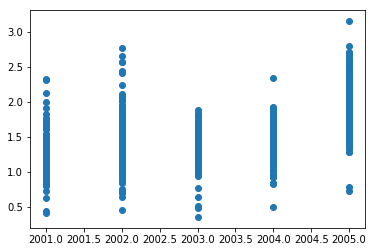

In [18]:
# using Pandas
plt.scatter(stocks_new['Year'],stocks_new['Volume'])

## Line plot

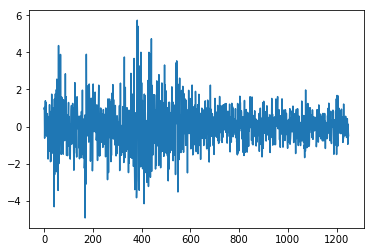

In [31]:
# use line plot to show the ups and downs
plt.plot(stocks_new.index, stocks_new['Today'])

## Histgram plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E293C9438>]],
      dtype=object)

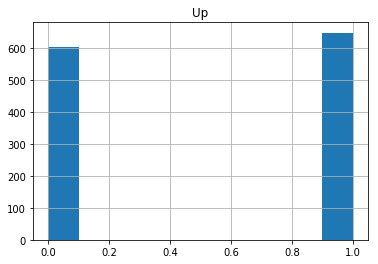

In [32]:
stocks_new.hist(column="Up")

## Boxplot

In [33]:
# boxplots: the middle 2 quartiles are located within the box in the middle 
### (with the median represented as a line in the box) 
### and the lower and upper quartiles are represented as lines (resembling whiskers) 
### protruding from either side of the box

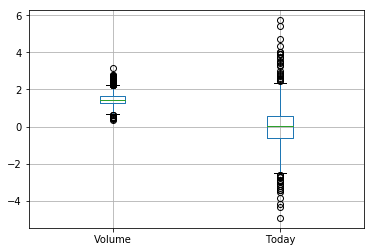

In [38]:
box = stocks_new[['Volume', 'Today']].boxplot()

## Pivot plot

Text(0.5,1,'Distribution of Volume')

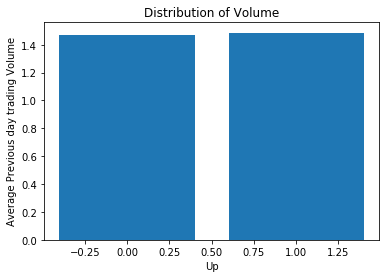

In [35]:
# average Up days and Downs Volume
Volume_by_Up = stocks_new.pivot_table(index="Up", values="Volume", aggfunc=np.mean)
plt.bar(Volume_by_Up.index,Volume_by_Up.Volume)
plt.xlabel('Up')
plt.ylabel('Average Previous day trading Volume')
plt.title("Distribution of Volume")

Text(0.5,1,'Distribution of return')

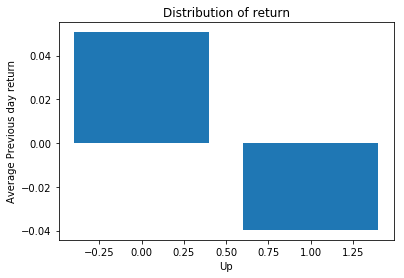

In [36]:
# obvious trend
Return_by_Up = stocks_new.pivot_table(index="Up", values="Lag1", aggfunc=np.mean)
plt.bar(Return_by_Up.index,Return_by_Up.Lag1)
plt.xlabel('Up')
plt.ylabel('Average Previous day return')
plt.title("Distribution of return")

In [37]:
Return_by_Up

,Lag1
Up,
0,0.050686
1,-0.039691
